In [ ]:
#Author: Emma Chubb

Part 1: Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

In [2]:
import pandas as pd

In [3]:
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)
df.tail(3)

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
9789,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,12
9790,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-14a4-13a3-e055-000000000001,Donegal County Council,Number,31
9791,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-1495-13a3-e055-000000000001,Monaghan County Council,Number,7


In [4]:
# get list of columns to know which to drop
headers = df.columns.tolist()
headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [5]:
drop_col_list = ['STATISTIC', 'Statistic Label','TLIST(A1)','CensusYear','C02199V02655','C02076V03371','C03789V04537','UNIT']
df.drop(columns=drop_col_list, inplace=True)

In [6]:
# get unique ages just to see what i'm working with
unique_ages = df['Single Year of Age'].unique()
unique_ages

array(['All ages', 'Under 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',
       '10 years', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '20 years', '21 years', '22 years', '23 years', '24 years',
       '25 years', '26 years', '27 years', '28 years', '29 years',
       '30 years', '31 years', '32 years', '33 years', '34 years',
       '35 years', '36 years', '37 years', '38 years', '39 years',
       '40 years', '41 years', '42 years', '43 years', '44 years',
       '45 years', '46 years', '47 years', '48 years', '49 years',
       '50 years', '51 years', '52 years', '53 years', '54 years',
       '55 years', '56 years', '57 years', '58 years', '59 years',
       '60 years', '61 years', '62 years', '63 years', '64 years',
       '65 years', '66 years', '67 years', '68 years', '69 years',
       '70 years', '71 years', '72 years', '73 years', '

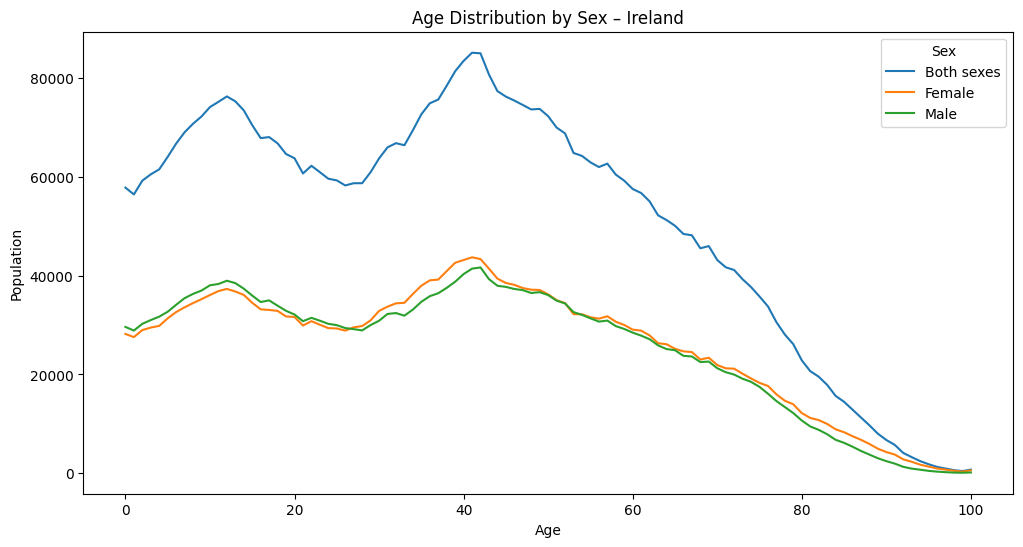

In [ ]:
# casting everything to str because of an error i encountered using str.replace
df['Single Year of Age'] = df['Single Year of Age'].astype(str)

# remove 'All ages' from the dataframe
df = df[df['Single Year of Age'] != 'All ages']

# replace under 1 year with 0
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')

# Now remove any non-digit characters from the 'Single Year of Age' column and convert to integer
df['Single Year of Age'] = df['Single Year of Age'].str.replace(r'\D', '', regex=True)
df['Single Year of Age'] = df['Single Year of Age'].astype(int)

In [8]:
#this section of code is just checking the structure of the dataframe
print (df.head(3))
# write out the entire file to local machine
df.to_csv("population_for_analysis.csv")

           Sex  Single Year of Age Administrative Counties  VALUE
32  Both sexes                   0                 Ireland  57796
33  Both sexes                   0   Carlow County Council    699
34  Both sexes                   0     Dublin City Council   6213


In [9]:
# Create a function that calculates weighted average so i can re-use code easily
# Code adapted from here: https://www.geeksforgeeks.org/python/how-to-calculate-weighted-average-in-pandas/ 

In [10]:
# define the function to calculate weighted average
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [11]:
# Weighted average of age  grouped by sex
weighted_ages = df.groupby('Sex').apply(weighted_average, value='Single Year of Age', weight='VALUE')

/tmp/ipykernel_4908/1338727983.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_ages = df.groupby('Sex').apply(weighted_average, value='Single Year of Age', weight='VALUE')


In [12]:
# round the results. see: https://www.w3schools.com/python/ref_func_round.asp 
weighted_ages = weighted_ages.round(2)

In [13]:
# print final result
print(weighted_ages)

Sex
Both sexes    38.35
Female        38.94
Male          37.74
dtype: float64


In [15]:
df

,Sex,Single Year of Age,Administrative Counties,VALUE
32,Both sexes,0,Ireland,57796
33,Both sexes,0,Carlow County Council,699
34,Both sexes,0,Dublin City Council,6213
35,Both sexes,0,Dún Laoghaire Rathdown County Council,2457
36,Both sexes,0,Fingal County Council,4009
...,...,...,...,...
9787,Female,100,Roscommon County Council,7
9788,Female,100,Sligo County Council,9
9789,Female,100,Cavan County Council,12
9790,Female,100,Donegal County Council,31


The next part of the assignment asks for the differences between the sexes by age. I have chosen a line plot for sex by age count to see if there are any differences between the groups. 

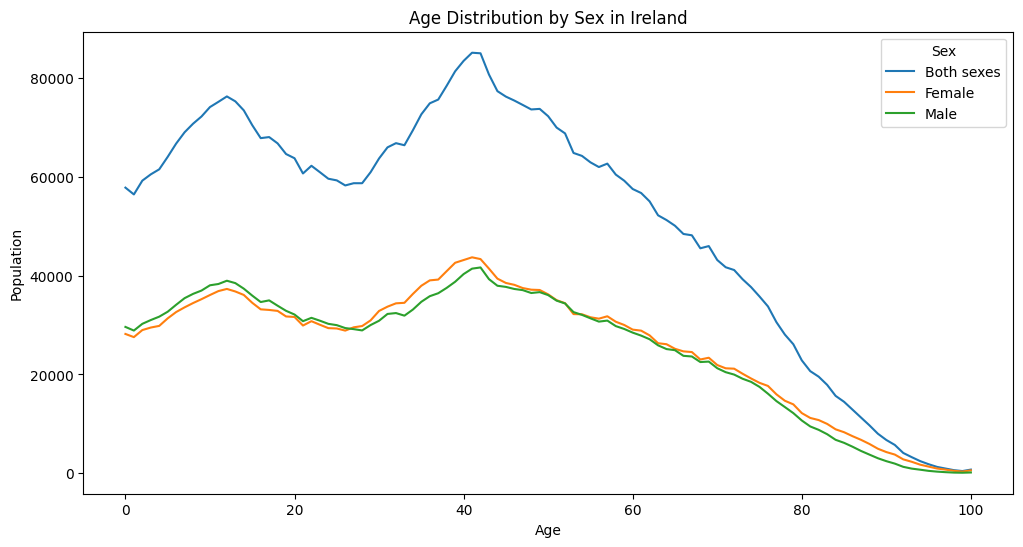

In [ ]:
# import pyplot to let us plot the lines: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html 
import matplotlib.pyplot as plt

# look only at ireland for simplcity
df_nat = df[df['Administrative Counties'] == 'Ireland']

# Pivot to get counts per sex by age. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html 
pivot_df = df_nat.pivot(index='Single Year of Age', columns='Sex', values='VALUE')
# choose fig size
pivot_df.plot(figsize=(12,6))
plt.title("Age Distribution by Sex in Ireland")
plt.ylabel("Population")
plt.xlabel("Age")
plt.show()

Part 2: In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

Answer: Fingal County Council. 

In [46]:
stored_age = 35

In [47]:
# write a boolean logic age group statement adaapted from: https://stackoverflow.com/questions/52753613/grouping-categorizing-ages-column 
age_group = df[(df['Single Year of Age'] >= stored_age - 5) & (df['Single Year of Age'] <= stored_age + 5)]

In [ ]:
# check the dataframe
print(age_group)

             Sex  Single Year of Age                Administrative Counties  \
992   Both sexes                  30                                Ireland   
993   Both sexes                  30                  Carlow County Council   
994   Both sexes                  30                    Dublin City Council   
995   Both sexes                  30  Dún Laoghaire Rathdown County Council   
996   Both sexes                  30                  Fingal County Council   
...          ...                 ...                                    ...   
7867      Female                  40               Roscommon County Council   
7868      Female                  40                   Sligo County Council   
7869      Female                  40                   Cavan County Council   
7870      Female                  40                 Donegal County Council   
7871      Female                  40                Monaghan County Council   

      VALUE  
992   63699  
993     705  
994   123

In [53]:
# drop 'both sexes' from this new dataframe. adapted from: https://stackoverflow.com/questions/69424104/how-to-delete-specific-values-from-a-column-in-a-dataset-python 
age_group = age_group[age_group['Sex'] != 'Both sexes']


In [ ]:
#  calculate the sum for each of the sexes in that age group
population_diff = age_group.groupby('Sex')['VALUE'].sum()

In [55]:
#print results
print(population_diff)

Sex
Female    829012
Male      768060
Name: VALUE, dtype: int64


In [ ]:
# Now that it's in an easy to use format, calculate the population difference between the sexes using loc. see: https://www.geeksforgeeks.org/machine-learning/difference-between-loc-and-iloc-in-pandas-dataframe/ 
pop_difference = population_diff.loc['Female'] - population_diff.loc['Male']

In [57]:
# print 
print(pop_difference)

60952


Part 3: Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

In [ ]:
# for this we'll go back to using the age group dataframe
# let's see if i can use groupby twice to get the difference by region. see: https://www.geeksforgeeks.org/pandas/pandas-group-by-multiple-columns/ 
# use unstack so the sexed become columns: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html 
region_age_population = age_group.groupby(['Administrative Counties', 'Sex'])['VALUE'].sum().unstack()


In [65]:
# print to see what it looks like
print(region_age_population)

Sex                                    Female    Male
Administrative Counties                              
Carlow County Council                    4774    4451
Cavan County Council                     6150    5776
Clare County Council                     8896    8085
Cork City Council                       19750   18812
Cork County Council                     26545   23706
Donegal County Council                  11700   10621
Dublin City Council                     59831   60867
Dún Laoghaire Rathdown County Council   18450   17074
Fingal County Council                   29092   26150
Galway City Council                      7650    7156
Galway County Council                   13904   12421
Ireland                                414506  384030
Kerry County Council                    11125    9957
Kildare County Council                  20602   18671
Kilkenny County Council                  7519    7012
Laois County Council                     7398    6877
Leitrim County Council      

In [67]:
# create a column called 'sex_diff' to hold the difference between the sexes for each region
region_age_population['Sex_Diff'] = (region_age_population['Female'] - region_age_population['Male']).abs()
print(region_age_population)


Sex                                    Female    Male  Sex_Diff
Administrative Counties                                        
Carlow County Council                    4774    4451       323
Cavan County Council                     6150    5776       374
Clare County Council                     8896    8085       811
Cork City Council                       19750   18812       938
Cork County Council                     26545   23706      2839
Donegal County Council                  11700   10621      1079
Dublin City Council                     59831   60867      1036
Dún Laoghaire Rathdown County Council   18450   17074      1376
Fingal County Council                   29092   26150      2942
Galway City Council                      7650    7156       494
Galway County Council                   13904   12421      1483
Ireland                                414506  384030     30476
Kerry County Council                    11125    9957      1168
Kildare County Council                  

In [ ]:
# now rank by sex diff to see which region has the biggest difference https://www.datacamp.com/tutorial/pandas-sort-values 
region_age_population.sort_values(by='Sex_Diff', ascending=False, inplace=True)
print(region_age_population)

Sex                                    Female    Male  Sex_Diff
Administrative Counties                                        
Ireland                                414506  384030     30476
Fingal County Council                   29092   26150      2942
Cork County Council                     26545   23706      2839
South Dublin County Council             26361   23637      2724
Kildare County Council                  20602   18671      1931
Meath County Council                    17715   15981      1734
Wicklow County Council                  11943   10338      1605
Galway County Council                   13904   12421      1483
Dún Laoghaire Rathdown County Council   18450   17074      1376
Wexford County Council                  12162   10824      1338
Kerry County Council                    11125    9957      1168
Louth County Council                    10928    9827      1101
Tipperary County Council                11982   10882      1100
Donegal County Council                  